In [20]:
using Pkg
Pkg.add("Plots")
Pkg.status()

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]
    Status `~/.julia/environments/v1.1/Project.toml`
  [336ed68f] CSV v0.4.3
  [9961bab8] Cbc v0.6.0
  [e2554f3b] Clp v0.6.1
  [c91e804a] Gadfly v1.0.1
  [2e9cd046] Gurobi v0.5.9
  [7073ff75] IJulia v1.17.0
  [b6b21f68] Ipopt v0.5.4
  [4076af6c] JuMP v0.19.0
  [b964fa9f] LaTeXStrings v1.0.3
  [76087f3c] NLopt v0.5.1
  [91a5bcdd] Plots v0.23.1
  [d330b81b] PyPlot v2.7.0


In [52]:
#PROBLEM 1Aa)

using JuMP, Gurobi, CSV
model = Model(with_optimizer(Gurobi.Optimizer))

data = CSV.read("yearSummary.csv", header = false)
expReturn = data[1:2:9, 2]
companies = data[1:2:9, 1]
variance = data[1:2:9, 3]

@variable(model, x[1:5]>=0)
@constraint(model, (sum(x[1:5]) == 1))

@objective(model, Max, sum(expReturn[i] * x[i] for i in 1:5))

optimize!(model)

println("Objective Value: ", objective_value(model))
for i in 1:5
    println(companies[i], ": ", value(x[i]))
end
println("Variance: ", sum(variance[i] * value(x[i])^2 for i in 1:5))

Academic license - for non-commercial use only
Optimize a model with 1 rows, 5 columns and 5 nonzeros
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 3e-01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.5355849e-01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.01 seconds
Optimal objective  2.535584920e-01
Objective Value: 0.253558492
AAPL: 0.0
ADBE: 0.0
AMZN: 1.0
CSCO: 0.0
MSFT: 0.0
Variance: 0.216974723


In [53]:
#PROBLEM 1Ab)

using JuMP, Ipopt, CSV

model = Model(with_optimizer(Ipopt.Optimizer))

data = CSV.read("yearSummary.csv", header = false)
var = data[1:2:9, 3]
companies = data[1:2:9, 1]
expReturn = data[1:2:9, 2]

@variable(model, x[1:5]>=0)
@NLobjective(model, Min, sum(var[i] * (x[i])^2 for i in 1:5))
@constraint(model, sum(x[1:5]) == 1)

optimize!(model)

println("Objective Value: ", objective_value(model))
for i in 1:5
    println(companies[i], ": ", value(x[i]))
end
println("Expected Value: ", sum(expReturn[i] * value(x[i]) for i in 1:5))


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        5

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:        5

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

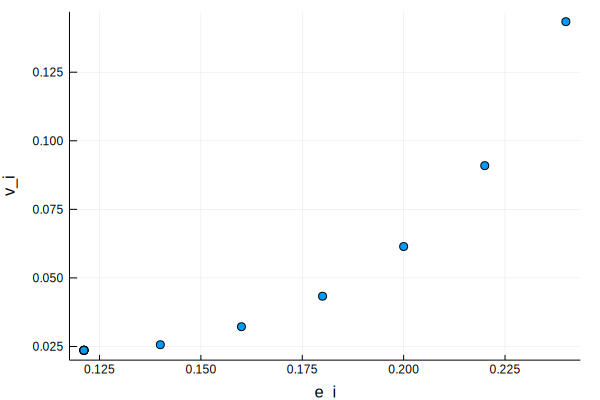

[0.121162, 0.121162, 0.121162, 0.121162, 0.121162, 0.121162, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]
Variances: Any[0.0236242, 0.0236242, 0.0236242, 0.0236242, 0.0236242, 0.0236242, 0.0256438, 0.0322086, 0.0433262, 0.061443, 0.0909355, 0.14342]


In [68]:
#PROBLEM 1Ad)

using JuMP, Ipopt, CSV, Plots

data = CSV.read("yearSummary.csv", header = false)
var = data[1:2:9, 3]
companies = data[1:2:9, 1]
expReturn = data[1:2:9, 2]
targetvals = collect(0.02:0.02:0.24)

expVals = []
vars = []

for j in 1:12
    model = Model(with_optimizer(Ipopt.Optimizer))
    
    @variable(model, x[1:5]>=0)
    @NLobjective(model, Min, sum(var[i] * (x[i])^2 for i in 1:5))
    @constraint(model, sum(x[1:5]) == 1)
    @constraint(model, sum(expReturn[i]*x[i] for i in 1:5) >= targetvals[j])

    optimize!(model)
    
    append!(expVals, sum(expReturn[i] * value(x[i]) for i in 1:5))
    append!(vars, objective_value(model))

end

println("Expected values: ", expVals)
println("Variances: ", vars)
    
display(scatter(expVals,vars, legend = false, xlabel = "e_i", ylabel = "v_i"))


In [60]:
#PART 1Ba)

using JuMP, Ipopt, CSV

data = CSV.read("covariance.csv", header = false)
covar = data[:,:]
model = Model(with_optimizer(Ipopt.Optimizer))

@variable(model, x[1:5]>=0)
@NLobjective(model, Min, sum(sum(data[i,j]*x[i]*x[j] for i in 1:5) for j in 1:5))
@constraint(model, sum(x[1:5])==1)

optimize!(model)
println("Objective Value: ", objective_value(model))
for i in 1:5
    println(companies[i], ": ", value(x[i]))
end

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Expected values: Any[0.0537934, 0.0537934, 0.06, 0.08]
Variances: Any[0.0672724, 0.0672724, 0.0679167, 0.0717411]
This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lower and upper bounds:        0
        inequality constraints with o

Expected values: Any[0.0537934, 0.0537934, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16]
Variances: Any[0.0672724, 0.0672724, 0.0679167, 0.0717411, 0.0782337, 0.0873772, 0.0985882, 0.111366]
This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        5
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        1
        inequality constraints with only lower bounds:        1
   inequality constraints with lowe

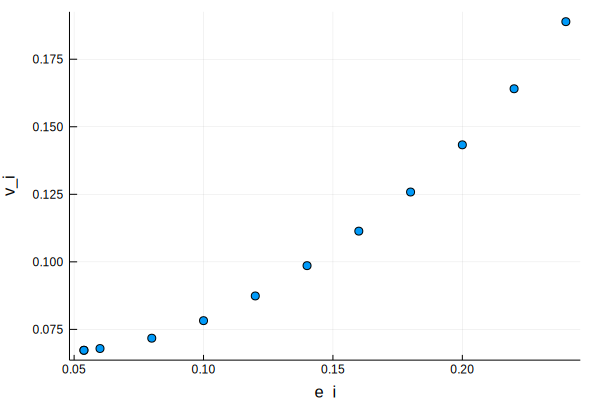

[0.0537934, 0.0537934, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24]
Variances: Any[0.0672724, 0.0672724, 0.0679167, 0.0717411, 0.0782337, 0.0873772, 0.0985882, 0.111366, 0.125845, 0.143313, 0.164066, 0.1889]


In [63]:
#PROBLEM 1Bb)

using JuMP, Ipopt, CSV, Plots

data = CSV.read("yearSummary.csv", header = false)
covarinfo = CSV.read("covariance.csv", header = false)
covar = covarinfo[:,:]
companies = data[1:2:9, 1]
expReturn = data[1:2:9, 2]
targetvals = collect(0.02:0.02:0.24)

expVals = []
vars = []

for k in 1:12
    model = Model(with_optimizer(Ipopt.Optimizer))
    
    @variable(model, x[1:5]>=0)
    @NLobjective(model, Min, sum(sum(covar[i,j]*x[i]*x[j] for i in 1:5) for j in 1:5))
    @constraint(model, sum(x[1:5]) == 1)
    @constraint(model, sum(expReturn[i]*x[i] for i in 1:5) >= targetvals[k])

    optimize!(model)
    
    append!(expVals, sum(expReturn[i] * value(x[i]) for i in 1:5))
    append!(vars, objective_value(model))
    println("Expected values: ", expVals)
    println("Variances: ", vars)
    

end

display(scatter(expVals,vars, legend = false, xlabel = "e_i", ylabel = "v_i"))


In [65]:
#PROBLEM 1Bd)

using JuMP, Ipopt, CSV, Plots

data = CSV.read("yearSummary.csv", header = false)
covarinfo = CSV.read("covariance.csv", header = false)
covar = covarinfo[:,:]
companies = data[1:2:9, 1]
expReturn = data[1:2:9, 2]

model = Model(with_optimizer(Ipopt.Optimizer))

@variable(model, x[1:5]>=0)
@NLobjective(model, Max, sum(expReturn[k]*x[k] for k in 1:5)/sum(sum(covar[i,j]*x[i]*x[j] for i in 1:5) for j in 1:5))
@constraint(model, sum(x[1:5]) == 1)

optimize!(model)
println("Sharpe Ratio: ", objective_value(model))
for i in 1:5
    println(companies[i], ": ", value(x[i]))
end


This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:       15

Total number of variables............................:        5
                     variables with only lower bounds:        5
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        1
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

Sharpe Ratio: 1.4372457995191983
AAPL: 0.09498810149882633
ADBE: 0.0
AMZN: 0.35335159573608876
CSCO: 0.08616329351264725
MSFT: 0.46549701234855534


In [75]:
#PROBLEM 4

using JuMP, Ipopt

model = Model(with_optimizer(Ipopt.Optimizer))

@variable(model, p_s >=0)
@variable(model, p_b >=0)
@variable(model, q_b >=0)
@variable(model, q_s >=0)

@objective(model, Max, (p_s-12)*q_s+(p_b-16)*q_b)

@constraint(model, 6*q_b+4.5*q_s <= 465)
@constraint(model, 3*q_b+6*q_s <= 420)
@constraint(model, 230-10*p_s == q_s)
@constraint(model, 440-20*p_b == q_b)

optimize!(model)

println("obj: ", objective_value(model))
println("p_s: ", value(p_s))
println("p_b: ", value(p_b))
println("q_s: ", value(q_s))
println("q_b: ", value(q_b))

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        4
Number of nonzeros in inequality constraint Jacobian.:        4
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        4
                     variables with only lower bounds:        4
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        2

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

obj: 460.48780631372506
p_s: 18.195121928750083
p_b: 19.92682923799324
q_s: 48.04878071249917
q_b: 41.46341524013519


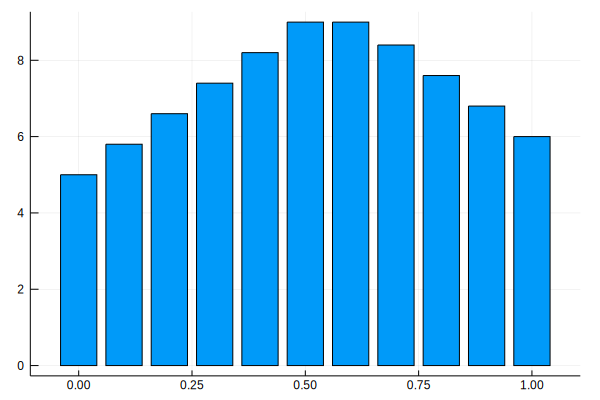

Q(lambda):Any[5.0, 5.8, 6.6, 7.4, 8.2, 9.0, 9.0, 8.4, 7.6, 6.8, 6.0]


In [80]:
using Plots

lambda = collect(0:0.1:1)
Qfinals = []
lengths = [10,13,11,11,9,10,14,12,7,5,6]
times = [10,7,8,12,13,12,6,7,12,13,12]

for i in 1:11 #loop through the lambda
    Qtemps = []
    for j in 1:11 #loop through each path
       push!(Qtemps, (1-lambda[i])*lengths[j]+lambda[i]*times[j])
    end
    sort!(Qtemps)
    push!(Qfinals, Qtemps[1])
end

println("Q(lambda):", Qfinals)
display(plot(lambda, Qfinals, seriestype = :bar, bins = 0.1, legend = false))